<a href="https://colab.research.google.com/github/harshadindigal/Introduction_to_Porfoliio_Construction_and_Analysis_with_Python/blob/master/Lab_Basics_of_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests 
import pandas as pd
import time 
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np

In [ ]:
def get_price_data(ticker, periodType, frequencyType, frequency, needExtendedHoursData):
  endpoint = r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format(ticker)
  payload = {'apikey': 'AAXQG3D8L3IEPV5HMK4SO9BDURKUGCU3',
            'periodType':periodType,
            'frequencyType': frequencyType,
            'frequency':frequency,
            'period':'1',
            'needExtendedHoursData':needExtendedHoursData}
  content = requests.get(url = endpoint, params = payload)
  data = content.json()
  print(data)
  test_data = pd.DataFrame.from_dict(data['candles'][0], orient='index')
  test_data_1 = test_data.T
  
  for items in data['candles']:
    temp = pd.DataFrame.from_dict(items, orient='index')
    temp_1 = temp.T
    test_data_1 = test_data_1.append(temp_1, ignore_index=True)
  return test_data_1



In [ ]:

gold = get_price_data("GOLD",'ytd','daily','1','false')
silver = get_price_data('SLV','ytd','daily','1','false')
spy = get_price_data('SPY','ytd','daily','1','false')
tlt = get_price_data('TLT','ytd','daily','1','false')
agg = get_price_data('AGG','ytd','daily','1','false')
volatility = get_price_data('UVXY','ytd','daily','1','false')

pd.set_option('float_format', '{:f}'.format)


In [ ]:
list_of_var = [gold,silver,spy,tlt,agg,volatility]
for var in list_of_var:
  var['datetime'] = pd.to_datetime(var['datetime'],unit='ms')

#fig, ax = plt.subplots()
#ax.plot_date(test['datetime'], test['close'])
#date_fmt = '%d-%m-%y %H:%M:%S'
#date_formatter = mdate.DateFormatter(date_fmt)
#ax.xaxis.set_major_formatter(date_formatter)
#fig.autofmt_xdate()
#plt.show()


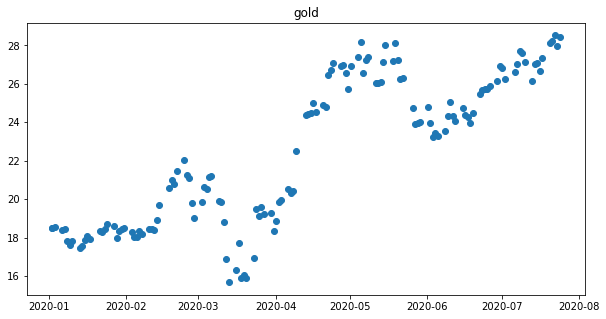

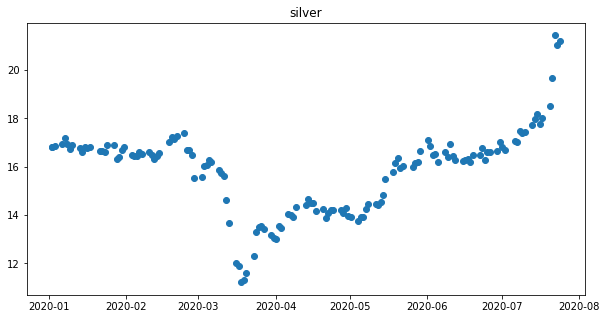

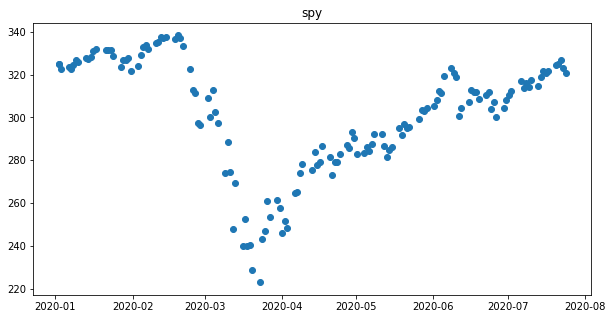

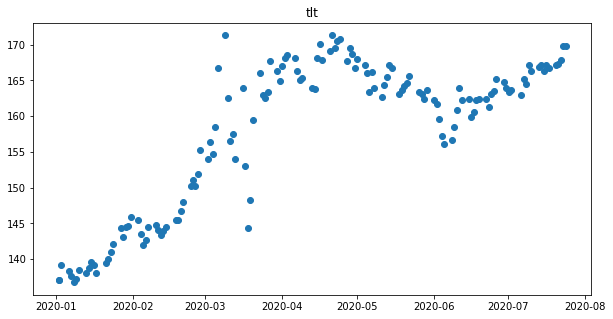

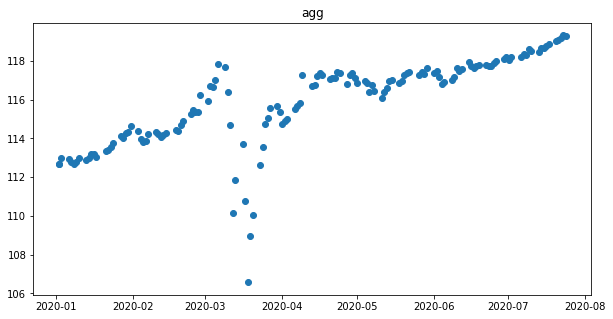

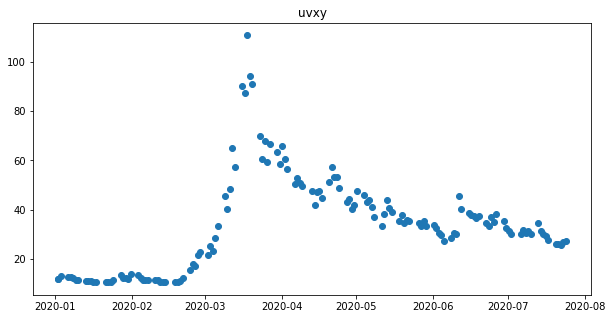

In [ ]:
variables = ["gold","silver","spy","tlt","agg","uvxy"]
for x in range(len(variables)):
  title = variables[x]
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca()
  ax.title.set_text(title)
  ax.plot_date(list_of_var[x]['datetime'],list_of_var[x]['close'])

In [ ]:
for x in range(len(variables)):
  list_of_var[x]["symbol"] = variables[x]
finish = pd.DataFrame()
for x in range(len(variables)):
  temp = list_of_var[x][['open','datetime',"symbol"]].iloc[1:]
  finish = finish.append(temp)
full_data = finish.pivot(index ='datetime', columns ='symbol')   
print(full_data)


                          open            ...                     
symbol                     agg      gold  ...        tlt      uvxy
datetime                                  ...                     
2020-01-02 06:00:00 112.680000 18.710000  ... 136.790000 12.360000
2020-01-03 06:00:00 112.890000 18.930000  ... 138.270000 13.550000
2020-01-06 06:00:00 113.130000 18.980000  ... 139.690000 13.650000
2020-01-07 06:00:00 112.920000 18.390000  ... 138.220000 12.910000
2020-01-08 06:00:00 112.850000 18.510000  ... 137.930000 12.550000
...                        ...       ...  ...        ...       ...
2020-07-20 05:00:00 119.030000 27.610000  ... 167.510000 27.360000
2020-07-21 05:00:00 119.100000 28.760000  ... 167.300000 24.930000
2020-07-22 05:00:00 119.220000 28.650000  ... 168.260000 26.570000
2020-07-23 05:00:00 119.350000 28.510000  ... 168.920000 25.480000
2020-07-24 05:00:00 119.260000 28.120000  ... 169.010000 28.340000

[142 rows x 6 columns]


In [ ]:
full_data.pct_change()

open                                                  
symbol                    agg      gold    silver       spy       tlt      uvxy
datetime                                                                       
2020-01-02 06:00:00       nan       nan       nan       nan       nan       nan
2020-01-03 06:00:00  0.001864  0.011758  0.004751 -0.007356  0.010820  0.096278
2020-01-06 06:00:00  0.002126  0.002641  0.014775 -0.002086  0.010270  0.007380
2020-01-07 06:00:00 -0.001856 -0.031085 -0.011066  0.007894 -0.010523 -0.054212
2020-01-08 06:00:00 -0.000620  0.006525  0.010601 -0.000248 -0.002098 -0.027885
...                       ...       ...       ...       ...       ...       ...
2020-07-20 05:00:00  0.000757  0.021080  0.021135 -0.001398  0.001435 -0.057364
2020-07-21 05:00:00  0.000588  0.041652  0.063181  0.015618 -0.001254 -0.088816
2020-07-22 05:00:00  0.001008 -0.003825  0.057889 -0.005606  0.005738  0.065784
2020-07-23 05:00:00  0.001090 -0.004887  0.021792  0.005699  0.003923 -0.041024
2020-07-24 05:00:00 -0.000754 -0.013679  0.011374 -0.016908  0.000533  0.112245

[142 rows x 6 columns]

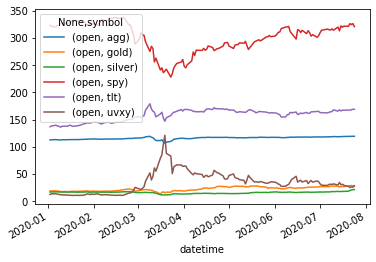

In [ ]:
full_data.plot()

([], <a list of 0 Text major ticklabel objects>)

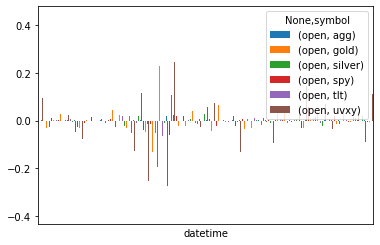

In [ ]:
full_data.pct_change().plot.bar()
plt.xticks([])


In [ ]:
full_data.pct_change().std()

      symbol
open  agg       2.323878
      gold      3.884177
      silver    1.745438
      spy      27.230193
      tlt      10.581031
      uvxy     20.043824
dtype: float64

In [ ]:
full_data.pct_change().mean()

      symbol
open  agg      0.000421
      gold     0.004010
      silver   0.002057
      spy      0.000198
      tlt      0.001639
      uvxy     0.013246
dtype: float64

*Calculate the   YTD rate of return for various securities


In [ ]:
((full_data.pct_change() + 1).prod() -1) * 100

      symbol
open  agg        5.839546
      gold      50.293960
      silver    26.722090
      spy       -0.800519
      tlt       23.554353
      uvxy     129.288026
dtype: float64

Annualization Factor = 12/Total Months Passed

Annulized Return = YTD return * Annualization Factor

In [ ]:
#252 estimated trading days in a year 
#140 rough estimate of trading days passed
annual_factor = 252/140
annual_roi = ((full_data.pct_change() + 1).prod() -1) * annual_factor
print(annual_roi*100)

      symbol
open  agg       10.511182
      gold      90.529129
      silver    48.099762
      spy       -1.440935
      tlt       42.397836
      uvxy     232.718447
dtype: float64
